# A választott adatbázisom a bike\_store, azon belül a products táblát adatprofilozom.

# Sorok száma

In [6]:
SELECT COUNT(*) AS sorok_szama
FROM products

(1 row affected)

Total execution time: 00:00:00.006

sorok_szama
321


# Null értékek száma a list\_price oszlopban

In [9]:
SELECT COUNT(list_price)
FROM products
WHERE list_price IS NULL

(1 row affected)

Total execution time: 00:00:00.005

(No column name)
0


# list\_price oszlop minimuma, maximuma, átlaga, szórása, varianciája

In [8]:
SELECT MIN(list_price) AS value_min, 
       MAX(list_price) AS value_max, 
       AVG(list_price) AS value_avg, 
       STDEV(list_price) AS value_stddev, 
       VAR(list_price) AS value_var
FROM products
WHERE list_price IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.020

value_min,value_max,value_avg,value_stddev,value_var
89.99,11999.99,1520.591401,"1612,1527653545156","2599036,538840212"


# 200 dollár alatti, 200 és 1000 dollár közti, és fölötti értékek száma

In [14]:
DECLARE 
@min int = 200,
@max int = 1000;   

SELECT 
    SUM(CASE WHEN list_price < @min THEN 1 ELSE 0 end) AS below_range,
    SUM(CASE WHEN list_price BETWEEN @min and @max THEN 1 ELSE 0 end) AS within_range,
    SUM(CASE WHEN list_price > @max THEN 1 ELSE 0 end) AS above_range
FROM products

(1 row affected)

Total execution time: 00:00:00.016

below_range,within_range,above_range
9,186,126


# Árak eloszlása

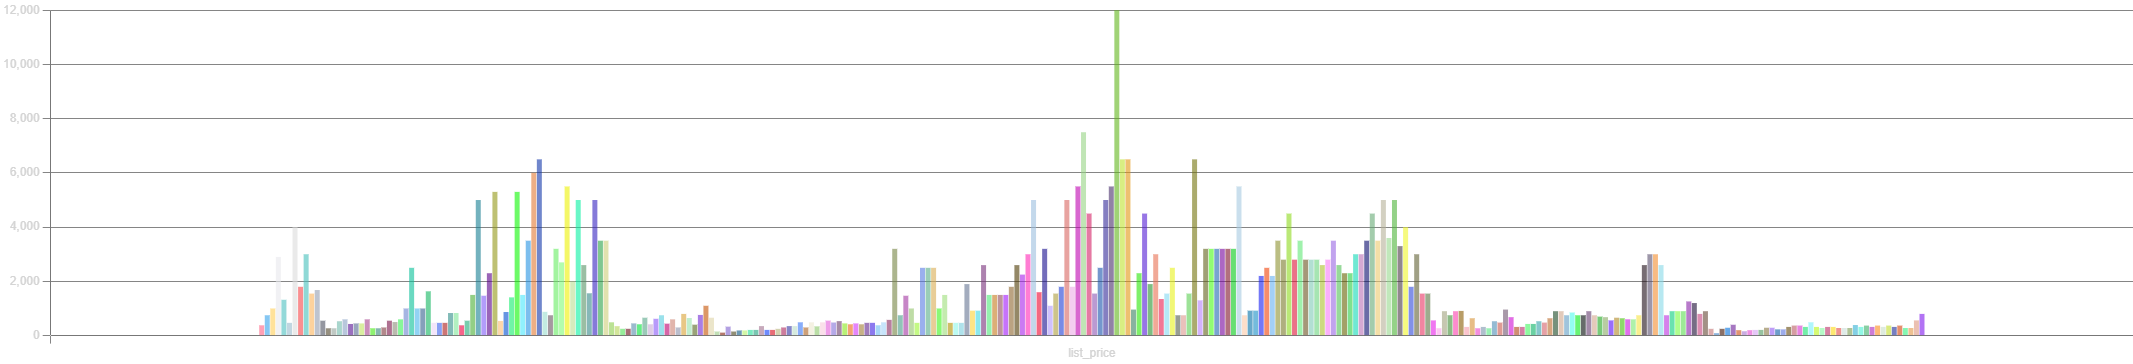

In [15]:
SELECT list_price
FROM products

(321 rows affected)

Total execution time: 00:00:00.039

list_price
379.99
749.99
999.99
2899.99
1320.99
469.99
3999.99
1799.99
2999.99
1549.00


# Minimum, maximum, átlag hossza a termékek neveinek

In [2]:
SELECT MIN(LEN(product_name)) AS string_length_min, 
       MAX(LEN(product_name)) AS string_length_max, 
       AVG(LEN(product_name)) AS string_length_avg, 
       STDEV(LEN(product_name)) AS string_length_stddev, 
       VAR(LEN(product_name)) AS string_length_var
FROM products
WHERE product_name IS NOT NULL
AND LEN(product_name) > 0

(1 row affected)

Total execution time: 00:00:00.006

string_length_min,string_length_max,string_length_avg,string_length_stddev,string_length_var
15,53,31,"8,078641410565174","65,26444704049845"


# Üres, és null értékek keresése a product\_name oszlopban

In [4]:
SELECT row_type,
    COUNT(*) row_count
FROM 
    (SELECT 
        CASE WHEN product_name IS NULL THEN 'Null'
            WHEN LEN(product_name) = 0 THEN 'Üres'
            ELSE 'Nem üres' 
            END AS row_type
        FROM products) rows
GROUP BY row_type

(1 row affected)

Total execution time: 00:00:00.014

row_type,row_count
Nem üres,321


# Egyedi értékek száma a product\_name oszlopban

In [6]:
SELECT COUNT(DISTINCT list_price) AS 'egyedi értékek'
FROM products
WHERE list_price IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.010

egyedi értékek
106


# model\_year oszlop minimuma, maximuma, átlaga

In [8]:
SELECT MIN(model_year) AS value_min, 
       MAX(model_year) AS value_max, 
       AVG(model_year) AS value_avg
FROM products
WHERE model_year IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.014

value_min,value_max,value_avg
2016,2019,2017
